g:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


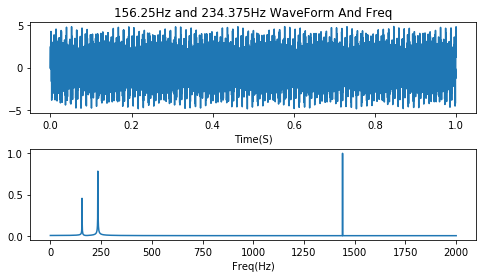

In [33]:
import numpy as np#导入一个数据处理模块
import matplotlib.pyplot as plt#导入一个绘图模块，matplotlib下的模块

#频率不能超过采样率的一半 -- xp
#更改采样率所导致的频谱变化巨大。只不过是rfft没有将全部的谱值输出，从而使结果不精准 -- xp
#增加fft_size，可以使rfft的输出谱值更多，从而使结果更精准

sampling_rate = 4000#采样频率为8000Hz
fft_size = 4000 #FFT处理的取样长度
t = np.arange(0, 1.0, 1.0/sampling_rate)#np.arange(起点，终点，间隔)产生1s长的取样时间
x = np.sin(2*np.pi*156.25*t) + 2*np.sin(2*np.pi*234.375*t) + 2*np.sin(2*np.pi*1440*t)#两个正弦波叠加，156.25HZ和234.375HZ
# N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），
# 因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,所以156.25的n为10,234.375的n为15。
xs = x[:fft_size]# 从波形数据中取样fft_size个点进行运算
xf = np.fft.rfft(xs)/fft_size# 利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，由公式可知/fft_size为了正确显示波形能量
# rfft函数的返回值是N/2+1个复数，分别表示从0(Hz)到sampling_rate/2(Hz)的分。
#于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#在指定的间隔内返回均匀间隔的数字
# xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
xfp = abs(xf)
#最后我们计算每个频率分量的幅值，并通过 20*np.log10()将其转换为以db单位的值。为了防止0幅值的成分造成log10无法计算，我们调用np.clip对xf的幅值进行上下限处理

#绘图显示结果
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t[:fft_size], xs)
plt.xlabel(u"Time(S)")
plt.title(u"156.25Hz and 234.375Hz WaveForm And Freq")
plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel(u"Freq(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()